# Gráficos interactivos 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import _plotly_utils.basevalidators
import plotly.express as px
from bokeh.layouts import column, row
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.plotting import Figure, show, output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
path_file    = 'egresados.xlsx'
df_egresados = pd.read_excel(path_file, sheet_name='egresados')

In [3]:
df_egresados.shape

(21, 61)

In [4]:
fields = ['mail', 'EmploymentStatus', 'country', 'year_in', 'year_out', 'background', 'program_after', 'mav_gen', 'finantial', 'post_grad']
df_egresados_subset_columns = pd.read_excel(path_file, index_col=0, usecols=fields)
df_egresados_subset_columns

,EmploymentStatus,country,year_in,year_out,mav_gen,background,program_after,finantial,post_grad
mail,,,,,,,,,
juanpabloescudero@icloud.com,Silentium,Chile,2014,2016,Masculino,Ingeniería en Sonido,NaN,NaN,NaN
jstevens@controlacustico.cl,Gerard Ingenieria Acustica SpA,Chile,2008,2009,Masculino,Ingeniería Civil Acústica,NaN,Recursos propios,NaN
claudia@espaciosacusticos.com,Espacios Acusticos,Mexico,2013,2015,Femenino,Arquitectura,NaN,NaN,NaN
jose.luis.castano@correounivalle.edu.co,Universidad del Valle,Colombia,2014,2017,Masculino,Ingeniería Física,Doctorado,Becas Bicentenario (Ministerio de Ciencias-Gob...,Universidad del Valle (Colombia)
luis.darmendrail@etu.unige.ch,Universite de Geneve,Switzerland,2011,2013,Masculino,Ingeniería Civil Acústica,Doctorado,Conicyt (ANID),Université de Genève
jayala@cenam.mx,Centro Nacional de Metrologia,Mexico,2017,2019,Masculino,Ingeniería Mecatrónica,NaN,NaN,NaN
acu.ramosromero@gmail.com,Universidad Politecnica de Madrid,Spain,2014,2017,Masculino,Ingeniería en Sonido y Acústica,Doctorado,Beca de posgrado del Gobierno Ecuatoriano SENE...,Universidad Politécnica de Madrid
rodolfolobo@ug.uchile.cl,Globant Chile,Chile,2014,2016,Masculino,Licenciatura en Artes con mención en Sonido,Doctorado,CAPES (Brasil),University of Campinas
cristian.acus8@gmail.com,Metro de Santiago,Chile,2015,2018,Masculino,Ingeniería Civil Acústica (Programa vinculación),NaN,NaN,NaN


In [5]:
df_egresados_subset_columns.shape

(21, 9)

In [6]:
df_egresados_subset_columns['country'].value_counts()

Chile          13
Mexico          2
Spain           2
Colombia        1
Switzerland     1
Austria         1
Ecuador         1
Name: country, dtype: int64

In [7]:
temp_series = df_egresados_subset_columns['mav_gen'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Gender distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="gender")

* A high number of graduated are males compared to females

In [8]:
temp_series = df_egresados_subset_columns['country'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Distribución de empleo por países'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="country")

> Un alto número de empleos se encuentran en Chile seguido de México, España y luego, Colombia, Suiza, Austria y Ecuador

In [9]:
temp_series = df_egresados_subset_columns['year_in'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Input year distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="year")

In [10]:
temp_series = df_egresados_subset_columns['EmploymentStatus'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Distribución de la situación laboral'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="EmploymentStatus")

In [11]:
cnt_srs = df_egresados_subset_columns['EmploymentStatus'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Viridis',
        showscale=True
    ),
)
layout = go.Layout(
    title='Distribución del empleo'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="background")

In [12]:
cnt_srs = df_egresados_subset_columns['background'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Viridis',
        showscale=True
    ),
)
layout = go.Layout(
    title='Distribución de la formación de pregrado'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="background")

In [13]:
cnt_srs = df_egresados_subset_columns['finantial'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Viridis',
        showscale=True
    ),
)
layout = go.Layout(
    title='Distribución del tipo de financiamiento'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="background")

In [14]:
cnt_srs = df_egresados_subset_columns['finantial'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Cividis',
        showscale=True
    ),
)
layout = go.Layout(
    title='Background distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="background")

In [15]:
cnt_srs = df_egresados_subset_columns['post_grad'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Cividis',
        showscale=True
    ),
)
layout = go.Layout(
    title='Background distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="background")

In [16]:
temp_series = df_egresados_subset_columns['post_grad'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Employment Status distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="EmploymentStatus")

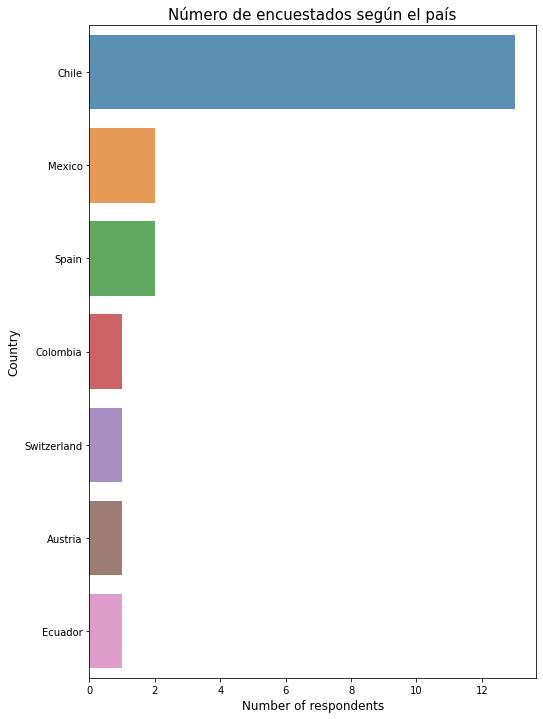

In [17]:
cnt_srs = df_egresados_subset_columns['country'].value_counts().head(25)
plt.figure(figsize=(8,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Number of respondents', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title("Número de encuestados según el país", fontsize=15)
plt.show()

In [18]:
LOCDATA="""COUNTRY,GDP (BILLIONS),CODE
Afghanistan,21.71,AFG
Albania,13.40,ALB
Algeria,227.80,DZA
American Samoa,0.75,ASM
Andorra,4.80,AND
Angola,131.40,AGO
Anguilla,0.18,AIA
Antigua and Barbuda,1.24,ATG
Argentina,536.20,ARG
Armenia,10.88,ARM
Aruba,2.52,ABW
Australia,1483.00,AUS
Austria,436.10,AUT
Azerbaijan,77.91,AZE
"Bahamas, The",8.65,BHM
Bahrain,34.05,BHR
Bangladesh,186.60,BGD
Barbados,4.28,BRB
Belarus,75.25,BLR
Belgium,527.80,BEL
Belize,1.67,BLZ
Benin,9.24,BEN
Bermuda,5.20,BMU
Bhutan,2.09,BTN
Bolivia,34.08,BOL
Bosnia and Herzegovina,19.55,BIH
Botswana,16.30,BWA
Brazil,2244.00,BRA
British Virgin Islands,1.10,VGB
Brunei,17.43,BRN
Bulgaria,55.08,BGR
Burkina Faso,13.38,BFA
Burma,65.29,MMR
Burundi,3.04,BDI
Cabo Verde,1.98,CPV
Cambodia,16.90,KHM
Cameroon,32.16,CMR
Canada,1794.00,CAN
Cayman Islands,2.25,CYM
Central African Republic,1.73,CAF
Chad,15.84,TCD
Chile,264.10,CHL
"People 's Republic of China",10360.00,CHN
Colombia,400.10,COL
Comoros,0.72,COM
"Congo, Democratic Republic of the",32.67,COD
"Congo, Republic of the",14.11,COG
Cook Islands,0.18,COK
Costa Rica,50.46,CRI
Cote d'Ivoire,33.96,CIV
Croatia,57.18,HRV
Cuba,77.15,CUB
Curacao,5.60,CUW
Cyprus,21.34,CYP
Czech Republic,205.60,CZE
Denmark,347.20,DNK
Djibouti,1.58,DJI
Dominica,0.51,DMA
Dominican Republic,64.05,DOM
Ecuador,100.50,ECU
Egypt,284.90,EGY
El Salvador,25.14,SLV
Equatorial Guinea,15.40,GNQ
Eritrea,3.87,ERI
Estonia,26.36,EST
Ethiopia,49.86,ETH
Falkland Islands (Islas Malvinas),0.16,FLK
Faroe Islands,2.32,FRO
Fiji,4.17,FJI
Finland,276.30,FIN
France,2902.00,FRA
French Polynesia,7.15,PYF
Gabon,20.68,GAB
"Gambia, The",0.92,GMB
Georgia,16.13,GEO
Germany,3820.00,DEU
Ghana,35.48,GHA
Gibraltar,1.85,GIB
Greece,246.40,GRC
Greenland,2.16,GRL
Grenada,0.84,GRD
Guam,4.60,GUM
Guatemala,58.30,GTM
Guernsey,2.74,GGY
Guinea-Bissau,1.04,GNB
Guinea,6.77,GIN
Guyana,3.14,GUY
Haiti,8.92,HTI
Honduras,19.37,HND
Hong Kong,292.70,HKG
Hungary,129.70,HUN
Iceland,16.20,ISL
India,2048.00,IND
Indonesia,856.10,IDN
Iran,402.70,IRN
Iraq,232.20,IRQ
Ireland,245.80,IRL
Isle of Man,4.08,IMN
Israel,305.00,ISR
Italy,2129.00,ITA
Jamaica,13.92,JAM
Japan,4770.00,JPN
Jersey,5.77,JEY
Jordan,36.55,JOR
Kazakhstan,225.60,KAZ
Kenya,62.72,KEN
Kiribati,0.16,KIR
"Korea, North",28.00,PRK
"Korea, South",1410.00,KOR
Kosovo,5.99,KSV
Kuwait,179.30,KWT
Kyrgyzstan,7.65,KGZ
Laos,11.71,LAO
Latvia,32.82,LVA
Lebanon,47.50,LBN
Lesotho,2.46,LSO
Liberia,2.07,LBR
Libya,49.34,LBY
Liechtenstein,5.11,LIE
Lithuania,48.72,LTU
Luxembourg,63.93,LUX
Macau,51.68,MAC
Macedonia,10.92,MKD
Madagascar,11.19,MDG
Malawi,4.41,MWI
Malaysia,336.90,MYS
Maldives,2.41,MDV
Mali,12.04,MLI
Malta,10.57,MLT
Marshall Islands,0.18,MHL
Mauritania,4.29,MRT
Mauritius,12.72,MUS
Mexico,1296.00,MEX
"Micronesia, Federated States of",0.34,FSM
Moldova,7.74,MDA
Monaco,6.06,MCO
Mongolia,11.73,MNG
Montenegro,4.66,MNE
Morocco,112.60,MAR
Mozambique,16.59,MOZ
Namibia,13.11,NAM
Nepal,19.64,NPL
Netherlands,880.40,NLD
New Caledonia,11.10,NCL
New Zealand,201.00,NZL
Nicaragua,11.85,NIC
Nigeria,594.30,NGA
Niger,8.29,NER
Niue,0.01,NIU
Northern Mariana Islands,1.23,MNP
Norway,511.60,NOR
Oman,80.54,OMN
Pakistan,237.50,PAK
Palau,0.65,PLW
Panama,44.69,PAN
Papua New Guinea,16.10,PNG
Paraguay,31.30,PRY
Peru,208.20,PER
Philippines,284.60,PHL
Poland,552.20,POL
Portugal,228.20,PRT
Puerto Rico,93.52,PRI
Qatar,212.00,QAT
Romania,199.00,ROU
Russia,2057.00,RUS
Rwanda,8.00,RWA
Saint Kitts and Nevis,0.81,KNA
Saint Lucia,1.35,LCA
Saint Martin,0.56,MAF
Saint Pierre and Miquelon,0.22,SPM
Saint Vincent and the Grenadines,0.75,VCT
Samoa,0.83,WSM
San Marino,1.86,SMR
Sao Tome and Principe,0.36,STP
Saudi Arabia,777.90,SAU
Senegal,15.88,SEN
Serbia,42.65,SRB
Seychelles,1.47,SYC
Sierra Leone,5.41,SLE
Singapore,307.90,SGP
Sint Maarten,304.10,SXM
Slovakia,99.75,SVK
Slovenia,49.93,SVN
Solomon Islands,1.16,SLB
Somalia,2.37,SOM
South Africa,341.20,ZAF
South Sudan,11.89,SSD
Spain,1400.00,ESP
Sri Lanka,71.57,LKA
Sudan,70.03,SDN
Suriname,5.27,SUR
Swaziland,3.84,SWZ
Sweden,559.10,SWE
Switzerland,679.00,CHE
Syria,64.70,SYR
Taiwan,529.50,TWN
Tajikistan,9.16,TJK
Tanzania,36.62,TZA
Thailand,373.80,THA
Timor-Leste,4.51,TLS
Togo,4.84,TGO
Tonga,0.49,TON
Trinidad and Tobago,29.63,TTO
Tunisia,49.12,TUN
Turkey,813.30,TUR
Turkmenistan,43.50,TKM
Tuvalu,0.04,TUV
Uganda,26.09,UGA
Ukraine,134.90,UKR
United Arab Emirates,416.40,ARE
United Kingdom,2848.00,GBR
United States,17420.00,USA
Uruguay,55.60,URY
Uzbekistan,63.08,UZB
Vanuatu,0.82,VUT
Venezuela,209.20,VEN
Vietnam,187.80,VNM
Virgin Islands,5.08,VGB
West Bank,6.64,WBG
Yemen,45.45,YEM
Zambia,25.61,ZMB
Zimbabwe,13.74,ZWE
    """

with open("location_map.csv", "w") as ofile:
    ofile.write(LOCDATA)

In [19]:
loc_df = pd.read_csv("location_map.csv")
new_df = pd.merge(df_egresados_subset_columns[["country","EmploymentStatus"]], loc_df, left_on="country", right_on="COUNTRY")
new_df = new_df.groupby(["country", "CODE"])["EmploymentStatus"].aggregate('count').reset_index()
new_df.columns = ["Country", "Code", "Count"]
#new_df['Percentage'] =  new_df['Count'] / float(new_df["Count"].sum())

data = [ dict(
        type = 'choropleth',
        locations = new_df['Code'],
        z = new_df['Count'],
        text = new_df['Country'],
        #colorscale = [[0,"rgb(5, 10, 172)"],[10,"rgb(40, 60, 190)"],[20,"rgb(70, 100, 245)"],\
        #    [30,"rgb(90, 120, 245)"],[40,"rgb(200, 200, 200)"],[4500,"rgb(220, 220, 220)"]],
        colorscale = [[0,"rgb(210, 210, 210)"], [4500,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Conteo de encuestados'),
      ) ]

layout = dict(
    title = 'Número de encuestados según el país',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )